In [170]:
# %%
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

- 2가지 구성 요소
    1. Figure: 틀
    2. Axes
        - Figure 바로 하위에서 실제 그래프가 그려질 공간
        - 실제로 가장 많이 핸들링 하게 될 요소이며, 이 안에 각종 plotting components가 존재

## Matplotlib의 2가지 interface

1. Stateful
2. Stateless

In [171]:
import FinanceDataReader as fdr

samsung_df = fdr.DataReader('005930', '2017-01-01', '2017-12-31')
samsung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2017-12-21,51000,51060,49100,49140,312486,-0.034198
2017-12-22,49400,49960,49240,49700,223993,0.011396
2017-12-26,49760,50100,48200,48200,320797,-0.030181


### Stateful

- Matplotlib이 암묵적으로 현재 상태를 들고 있음
    - 내부적으로 현재 타겟이 되는 figure, ax 등을 설정하고, operation이 발생하면 '내부에서' 해당 figure, ax에 적용함
- 권장하지 않음
    - matplotlib이 암묵적, 내부적으로 변화를 진행하고 적용하기 때문에 직관적이지 않음
    - 다수의 plot을 한 번에 그리기 어려움
    - 간단히 테스트 할 경우 사용하는 것을 권장

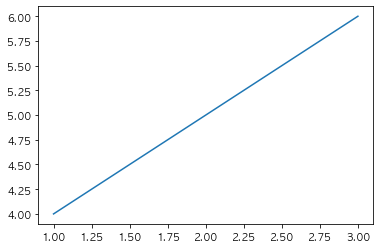

In [172]:
x = [1, 2, 3]
y = [4, 5, 6]
plt.plot(x, y)
# plt.show()
# `%matplotlib inline` 사용해서 생략 가능

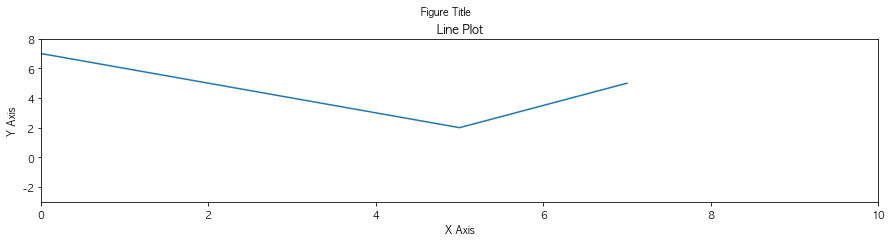

In [173]:
x = [-3, 5, 7]
y = [10, 2, 5]

# InteractiveShell.ast_node_interactivity = 'all'
# 위 설정이 되어있더라도 라인 끝에 세미콜론을 붙일 경우 내용이 출력되지 않음
plt.figure(figsize=(15, 3));
plt.plot(x, y);
plt.xlim(0, 10);
plt.ylim(-3, 8);
plt.xlabel('X Axis');
plt.ylabel('Y Axis');
plt.title('Line Plot');
plt.suptitle('Figure Title', size=10, y=1.03);

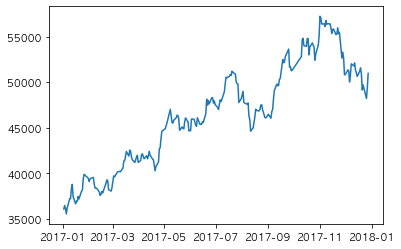

In [174]:
plt.plot(samsung_df.index, samsung_df['Close']);

### Stateless - Object Oriented

- Matplotlib의 각 component를 하나의 object로 받아서 함수 실행 및 property 설정/변경
    - figure, ax(es)를 먼저 생성한 다음 하나하나 더하고 적용하는 방법
- 적용과정이 명시적으로 코드로 드러나기 때문에 조금 더 직관적임

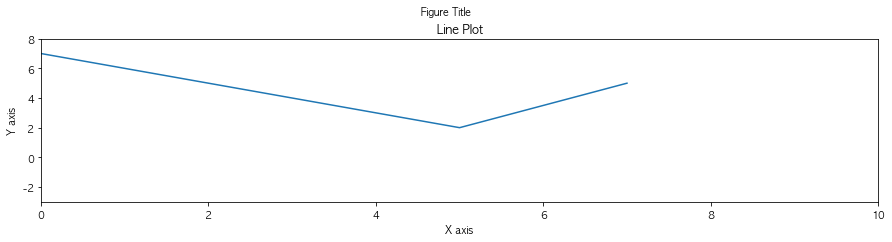

In [175]:
x = [-3, 5, 7]
y = [10, 2, 5]

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y);
ax.set_xlim(0, 10);
ax.set_ylim(-3, 8);
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_title('Line Plot');
fig.suptitle('Figure Title', size=10, y=1.03);

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

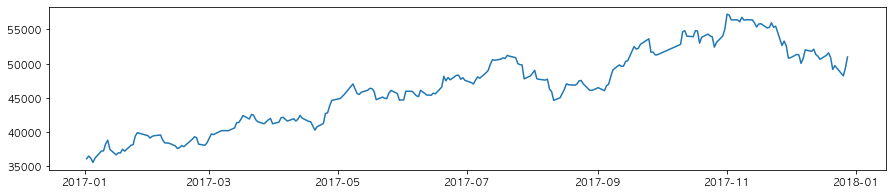

In [176]:
fig, ax = plt.subplots(figsize=(15, 3))

type(fig), type(ax)
ax.plot(samsung_df.index, samsung_df['Close'])

## Matplotlib 들여다보기

`figure` & `axes`

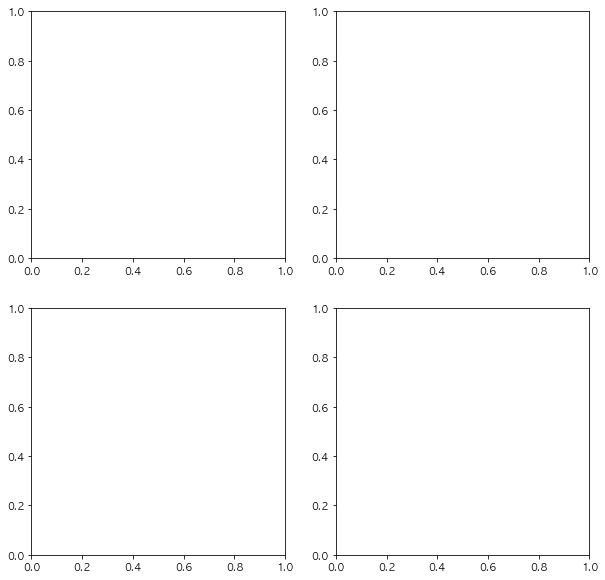

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

In [178]:
type(fig)
type(axes), axes # NUMPY ARRAY ?!

matplotlib.figure.Figure

(numpy.ndarray,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [179]:
axes[0][0]

<AxesSubplot:>

#### Children of axes

- `spines`: axes를 둘러싸고 있는 border
- `axis`: x, y 축. tick, label 등을 들고 있음

In [180]:
axes[0][0].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [181]:
ax = axes[0][0]

In [182]:
ax.xaxis
ax.get_xaxis()
ax.xaxis == ax.get_xaxis()

True

In [183]:
data = fdr.DataReader('005930', '2019-01-01', '2019-12-31')
close_series = data['Close']
volume_series = data['Volume']

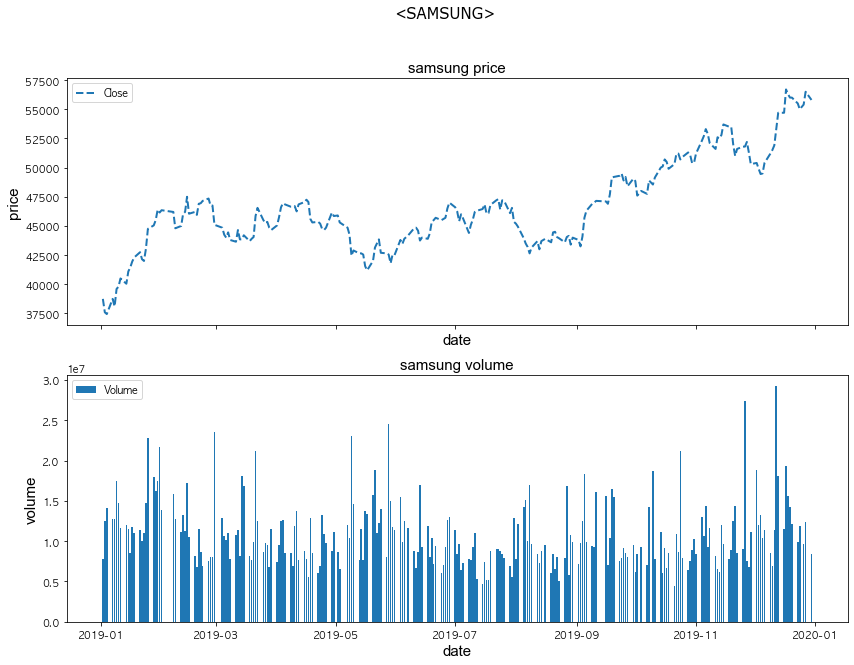

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax1 = axes[0]
ax2 = axes[1]

ax1.plot(close_series.index, close_series, linewidth=2, linestyle='--', label='Close')
ax1.set_title('samsung price', fontsize=15, family='Arial')
ax1.set_ylabel('price', fontsize=15, family='Arial')
ax1.set_xlabel('date', fontsize=15, family='Arial')
ax1.legend(loc='upper left')

# ax2.plot(kind='bar')
ax2.bar(volume_series.index, volume_series, label='Volume')
ax2.set_title('samsung volume', fontsize=15, family='Arial')
ax2.set_ylabel('volume', fontsize=15, family='Arial')
ax2.set_xlabel('date', fontsize=15, family='Arial')
ax2.legend(loc='upper left')

fig.suptitle("<SAMSUNG>", fontsize=15, family='Verdana');

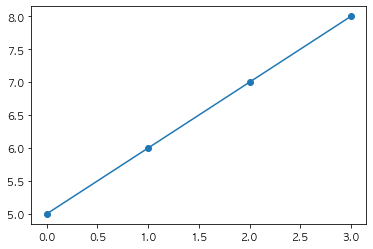

In [185]:
f, a = plt.subplots()
a.plot([5, 6, 7, 8], marker='o');

## Plotting with Pandas

- DataFrame, Series는 `plot()`을 호출하면, 내부적으로 matplotlib api를 호출함
- plot을 실행한 후 ax를 return
- matplotlib arg는 그대로 전달 가능
- plot의 종류(`kind` arg)
    - `bar`, `line`, `scatter`, etc.
    - `hist`, `box`, etc.

In [186]:
samsung_series = fdr.DataReader('005930', '2017-01-01', '2018-01-01')['Close']
kodex_series = fdr.DataReader('069500', '2017-01-01', '2018-01-01')['Close']

import pandas as pd
price_df = pd.concat([samsung_series, kodex_series], axis=1)
price_df.columns = ['삼성전자', 'KODEX200']
price_df

,삼성전자,KODEX200
Date,,
2017-01-02,36100,23451
2017-01-03,36480,23638
2017-01-04,36160,23665
2017-01-05,35560,23572
2017-01-06,36200,23673
...,...,...
2017-12-21,49140,28976
2017-12-22,49700,29115
2017-12-26,48200,28997


In [187]:
price_max_df = price_df.groupby(price_df.index.month).max() # 월봉의 high_price
price_max_df

,삼성전자,KODEX200
Date,,
1,39900,24316
2,39560,24547
3,42560,25512
4,44620,25945
5,47020,27816
6,48300,28360
7,51200,29176
8,49000,28812
9,53620,28872


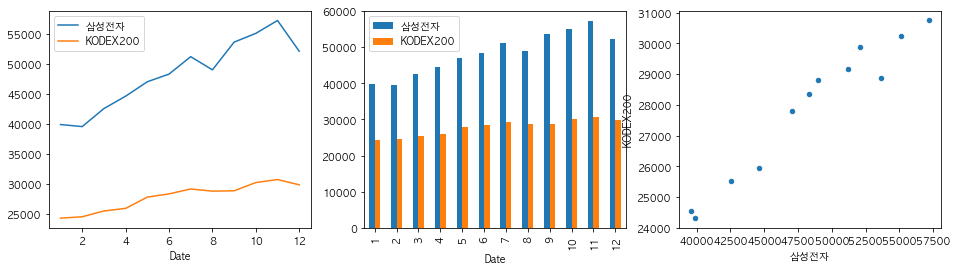

In [188]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

price_max_df.plot(ax=ax1, kind='line');
price_max_df.plot(ax=ax2, kind='bar');
price_max_df.plot(ax=ax3, x='삼성전자', y='KODEX200', kind='scatter');

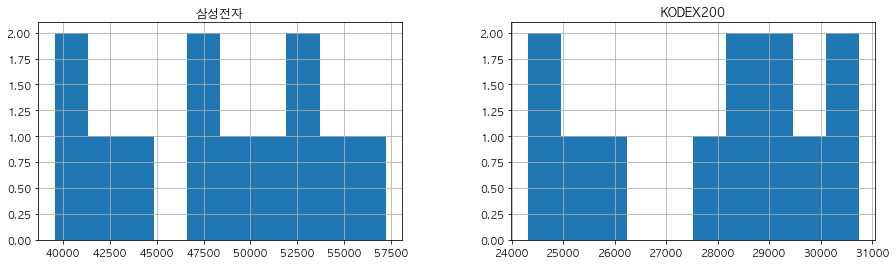

In [189]:
price_max_df.hist(figsize=(15, 4));

In [190]:
price_df.pct_change() # percent change, 수익률 계산 => p2 / p1 - 1

,삼성전자,KODEX200
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.010526,0.007974
2017-01-04,-0.008772,0.001142
2017-01-05,-0.016593,-0.003930
2017-01-06,0.017998,0.004285
...,...,...
2017-12-21,-0.034198,-0.019458
2017-12-22,0.011396,0.004797
2017-12-26,-0.030181,-0.004053


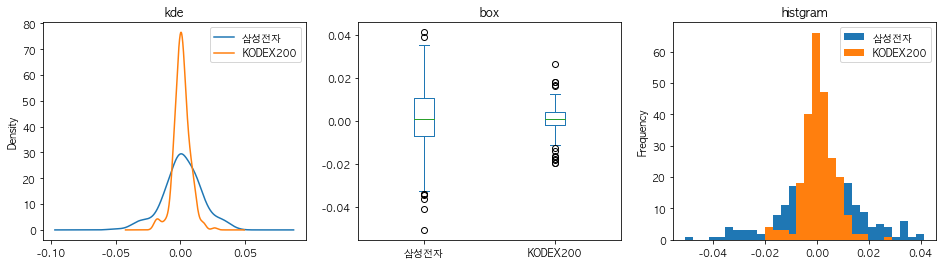

In [191]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(kind='box', ax=ax2, title='box');
price_df.pct_change().plot(kind='hist', ax=ax3, title='histgram', bins=30);

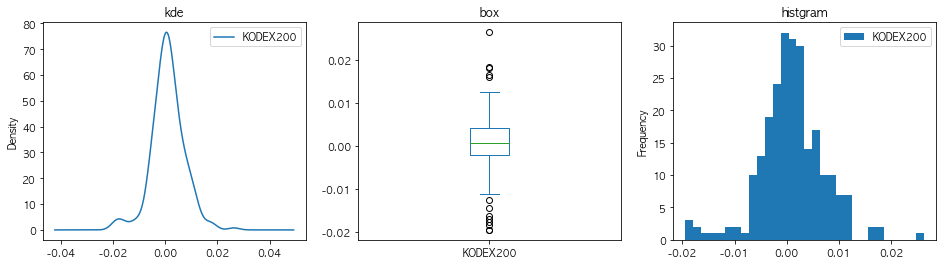

In [192]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

price_df.pct_change().plot(x='삼성전자', kind='kde', ax=ax1, title='kde');
price_df.pct_change().plot(x='삼성전자', kind='box', ax=ax2, title='box');
price_df.pct_change().plot(x='삼성전자', kind='hist', ax=ax3, title='histgram', bins=30);

In [193]:
# matplotlib korean setting
import matplotlib.font_manager as fm
import matplotlib as mpl

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

[('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'),
 ('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('Noto Sans Gothic',
  '/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf')]

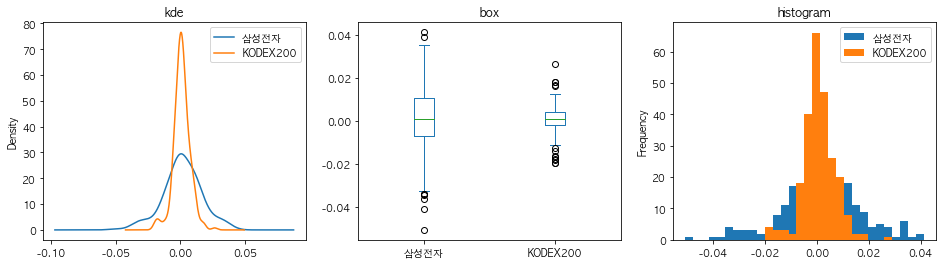

In [194]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

price_df.pct_change().plot(kind='kde', ax=ax1, title='kde')
price_df.pct_change().plot(kind='box', ax=ax2, title='box')
price_df.pct_change().plot(kind='hist', ax=ax3, title='histogram', bins=30);